In [5]:
from sympy.interactive.printing import init_printing
from sympy import *
import numpy as np
init_printing(use_unicode=True)

# Fourier Series
## Introduction 
For a periodic function $f$ of period $P$, the Fourier series expansion enables to write the function with the following form:
$$
f(t) = \frac{a_{0}}{2} + \sum^{\infty}_{n=1} a_{n} \cos (2n\pi \frac{t}{P}) + \sum^{\infty}_{n=1} b_{n} \sin (2n\pi \frac{t}{P})
$$

where the constant coefficients $a_n$ and $b_n$ are defined according to: 
$$
a_n = \frac{2}{P}\int^{\frac{P}{2}}_{-\frac{P}{2}}f(t) \cos(2n\pi\frac{t}{P})dt
$$
, 
$$
b_n = \frac{2}{P}\int^{\frac{P}{2}}_{-\frac{P}{2}}f(t) \sin(2n\pi\frac{t}{P})dt
$$
and the first term of expansion is defined by $a_{0}$ is twice the average of $f(t)$ over the domain $P$:
$$
\frac{a_{0}}{2} = \frac{1}{P}\int^{\frac{P}{2}}_{-\frac{P}{2}}f(t)dt
$$

We can notice that:
* if $f$ is an even function, which means $f(-t) = f(t)$, then $\forall n \in   \rm I\!N^{+}, b_{n} = 0 $
* if $f$ is an odd function, which means $f(-t) = -f(t)$, then $\forall n \in   \rm I\!N^{+}, a_{n} = 0 $

## Exercises
### 1. Fourier Series expansion of basic functions 
For both functions of $f(t)=t$ and $f(t) = \vert \cos(\pi\frac{t}{P})\vert$ 
* Q.1 - Define the function, with the assumption that is only defined on $P$.
* Q.2 - Plot the function over $[\frac{-P}{2}, \frac{P}{2}]$ with $P = 1$
* Q.3 - compute manually $a_n$ and $b_n$ and check if the function is even or odd 
* Q.4 - Give the first seven elements of $a_n$ or $b_n$ depending if the function is odd or even 

In [39]:
#Q.1 :

t,P = symbols('t,P',positive=True)

def f1(t):
    return t
    
def f2(t):
    return sqrt((cos((pi*t)/P))**2)

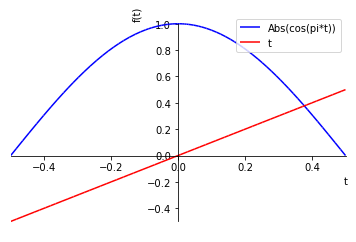

In [40]:
#Q.2 :

P=1

graph = plot(f2(t),f1(t), (t,(-P/2),(P/2)), show=False, legend=True)

graph[0].line_color = "b"
graph[1].line_color = "r"

graph.show()

In [53]:
#Q.3 :

n = symbols('n', positive=True)
an1, an2, bn1, bn2 = symbols('an1,an2,bn1,bn2')

an1 = (2/P)*integrate(f1(t)*cos(2*n*pi*(t/P)), (t, (-P/2), (P/2)))
bn1 = (2/P)*integrate(f1(t)*sin(2*n*pi*(t/P)), (t, (-P/2), (P/2)))
if an1 == 0 :
    print("the function f(t)=t is odd.")
else :
    print("the function f(t)=t is even.")
    
an2 = (2/P)*integrate(f2(t)*cos(2*n*pi*(t/P)), (t, (-P/2), (P/2)))
bn2 = (2/P)*integrate(f2(t)*sin(2*n*pi*(t/P)), (t, (-P/2), (P/2)))

if an2 == 0 :
    print("the function f(t)=|cos(pi*t/P)| is odd.")
else :
    print("the function f(t)=|cos(pi*t/P)| is even.")

the function f(t)=t is odd.
the function f(t)=|cos(pi*t/P)| is even.


In [58]:
#Q.4 :

n = 1

while n < 8:
    bn1 = (2/P)*integrate(f1(t)*sin(2*n*pi*(t/P)), (t, (-P/2), (P/2)))
    print(bn1)
    n = n+1
    
n = 1

while n < 8:
    an2 = (2/P)*integrate(f2(t)*cos(2*n*pi*(t/P)), (t, (-P/2), (P/2)))
    print(an2)
    n = n+1 

    #I dont know why the 2nd function is not solving itself

1.0/pi
-0.5/pi
0.333333333333333/pi
-0.25/pi
0.2/pi
-0.166666666666667/pi
0.142857142857143/pi
2.0*Integral(cos(2*pi*t)*Abs(cos(pi*t)), (t, -0.5, 0.5))
2.0*Integral(cos(4*pi*t)*Abs(cos(pi*t)), (t, -0.5, 0.5))
2.0*Integral(cos(6*pi*t)*Abs(cos(pi*t)), (t, -0.5, 0.5))
2.0*Integral(cos(8*pi*t)*Abs(cos(pi*t)), (t, -0.5, 0.5))
2.0*Integral(cos(10*pi*t)*Abs(cos(pi*t)), (t, -0.5, 0.5))
2.0*Integral(cos(12*pi*t)*Abs(cos(pi*t)), (t, -0.5, 0.5))
2.0*Integral(cos(14*pi*t)*Abs(cos(pi*t)), (t, -0.5, 0.5))


## Fourier Series functions of sympy

In [23]:
s= fourier_series(f(t,1), (t, -pi, pi))

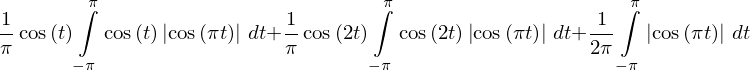

In [37]:
s.truncate(3)

In [39]:
from sympy.series import fourier

In [41]:
s2 = fourier.fourier_series(f(t,1), (-pi, pi))


In [43]:
s2.an

⎡       π                                 π                                   
⎢       ⌠                                 ⌠                                   
⎢cos(t)⋅⎮  cos(t)⋅│cos(π⋅t)│ dt  cos(2⋅t)⋅⎮  cos(2⋅t)⋅│cos(π⋅t)│ dt  cos(3⋅t)⋅
⎢       ⌡                                 ⌡                                   
⎢       -π                                -π                                  
⎢──────────────────────────────, ──────────────────────────────────, ─────────
⎣              π                                 π                            

π                                   π                           ⎤
⌠                                   ⌠                           ⎥
⎮  cos(3⋅t)⋅│cos(π⋅t)│ dt  cos(4⋅t)⋅⎮  cos(4⋅t)⋅│cos(π⋅t)│ dt   ⎥
⌡                                   ⌡                           ⎥
-π                                  -π                          ⎥
─────────────────────────, ──────────────────────────────────, …⎥
       π                                   π      

In [47]:
if s2.is_even:
    print ('yes')
else:
    print ('No')

No


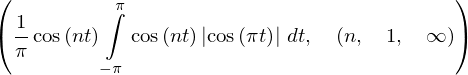

In [52]:
s2.an.args

In [53]:
fourier.FourierSeries??